In [4]:
import numpy as np

#parameters
num_bidders = 5
highest_possible_value = 100

#generate private values for each bidder from the interval [0,100]
valuations = np.random.uniform(0,highest_possible_value, num_bidders)

#calculate bidders - fpsb strat
#bidders shade their bid: bid = (N-1)/N * Value
bids = valuations * (num_bidders - 1) / num_bidders

#highest wins
winning_bid = np.max(bids)
winner_index = np.argmax(bids)
winner_valuation = valuations[winner_index]

#print results
print(f"Number of bidders: {num_bidders}")
print(f"Private valuations: {valuations}")
print(f"Bids: {bids}")
print(f"Winning bid is : {winning_bid}")
print(f"Winner is bidder {winner_index} with true valuation of {winner_valuation}")

Number of bidders: 5
Private valuations: [26.60052628 82.83286077 46.35988317 81.14508938 46.02918119]
Bids: [21.28042102 66.26628862 37.08790654 64.91607151 36.82334495]
Winning bid is : 66.26628861670028
Winner is bidder 1 with true valuation of 82.83286077087536


In [8]:
#generate more data

num_bidders = 8
highest_possible_value = 100
num_simulations = 1000
revenues = []

for i in range(num_simulations):
    valuations = np.random.uniform(0,highest_possible_value, num_bidders)
    bids = valuations * (num_bidders - 1) / num_bidders
    winning_bid = np.max(bids)
    #store the result
    revenues.append(winning_bid)
average_revenue = np.mean(revenues)
print(f"Avg seller revenue: {average_revenue} over {num_simulations} simulations")
    

Avg seller revenue: 77.65264761973633 over 1000 simulations


In [10]:
#vectorize the performance

import time

num_simulations = 100000
num_bidders = 5
highest_possible_value = 100

start_time = time.time()
#generate valuations for all the simulations at once
valuations = np.random.uniform(0,highest_possible_value, size = (num_bidders, num_simulations))

bids = valuations * (num_bidders - 1) / num_bidders
#operate along columns
winning_bids = np.max(bids,axis=0)

vectorized_avg_revenue = np.mean(winning_bids)

end_time = time.time()
print(f"--- Vectorized Simulation ---")
print(f"Time taken: {end_time - start_time:.4f} seconds")
print(f"Average Revenue: ${vectorized_avg_revenue:.2f}")

--- Vectorized Simulation ---
Time taken: 0.0058 seconds
Average Revenue: $66.66


In [10]:
#comparing fpsb and spsb
import time
import numpy as np


def simulate(auction_type):
    num_simulations = 100000000
    num_bidders = 5
    highest_possible_value = 100
    
    start_time = time.time()
    #generate valuations for all the simulations at once
    valuations = np.random.uniform(0,highest_possible_value, size = (num_bidders, num_simulations))
    if (auction_type == 'first_price'):
        bids = valuations * (num_bidders - 1) / num_bidders
        winning_bids = np.max(bids,axis=0)
    elif (auction_type == 'second_price'):
        bids = valuations
        winning_bids = np.sort(bids, axis=0)[-2]
    else:
        print('enter a valid auction')
        pass
    top_valuer_indices = np.argmax(valuations, axis=0)
    top_bidder_indices = np.argmax(bids, axis=0)
    allocative_efficiency = (top_valuer_indices == top_bidder_indices)
    print("\nWas each auction efficient?:", allocative_efficiency)
    efficiency_percentage = np.mean(allocative_efficiency) * 100
    print(f"\nOverall Allocative Efficiency: {efficiency_percentage:.2f}%")
    vectorized_avg_revenue = np.mean(winning_bids)
    end_time = time.time()
    print(f"--- Vectorized Simulation ---")
    print(f"Auction type: {auction_type}")
    print(f"Time taken: {end_time - start_time:.4f} seconds")
    print(f"Average Revenue: ${vectorized_avg_revenue:.2f}")

simulate("first_price")
simulate("second_price")


Was each auction efficient?: [ True  True  True ...  True  True  True]

Overall Allocative Efficiency: 100.00%
--- Vectorized Simulation ---
Auction type: first_price
Time taken: 133.0261 seconds
Average Revenue: $66.67

Was each auction efficient?: [ True  True  True ...  True  True  True]

Overall Allocative Efficiency: 100.00%
--- Vectorized Simulation ---
Auction type: second_price
Time taken: 108.5401 seconds
Average Revenue: $66.67


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
NUM_SIMULATIONS = 100000
NUM_BIDDERS = 5
MAX_VALUE = 100

# --- Generate FPSB Data ---
# Generate valuations: shape is (num_bidders, num_simulations)
fpsb_valuations = np.random.uniform(0, MAX_VALUE, size=(NUM_BIDDERS, NUM_SIMULATIONS))
# Calculate bids based on FPSB strategy
fpsb_bids = fpsb_valuations * (NUM_BIDDERS - 1) / NUM_BIDDERS
# Revenue is the highest bid in each auction (column)
fpsb_revenues = np.max(fpsb_bids, axis=0)

# --- Generate SPSB Data ---
spsb_valuations = np.random.uniform(0, MAX_VALUE, size=(NUM_BIDDERS, NUM_SIMULATIONS))
# Bids are equal to valuations in SPSB
spsb_bids = spsb_valuations
# Sort bids in each column to find the second-highest
sorted_spsb_bids = np.sort(spsb_bids, axis=0)
# Revenue is the second-highest bid
spsb_revenues = sorted_spsb_bids[-2, :]

# --- Combine into a DataFrame ---
results_df = pd.DataFrame({
    'fpsb_revenue': fpsb_revenues,
    'spsb_revenue': spsb_revenues
})

# For the scatter plot, we'll just need one set of valuations and bids
scatter_valuations = fpsb_valuations.flatten() # Flatten to a 1D array
scatter_fpsb_bids = fpsb_bids.flatten()
scatter_spsb_bids = spsb_valuations.flatten() # Bids are the same as valuations

print("Sample data created successfully. Now you can run the plotting code.")

Sample data created successfully. Now you can run the plotting code.


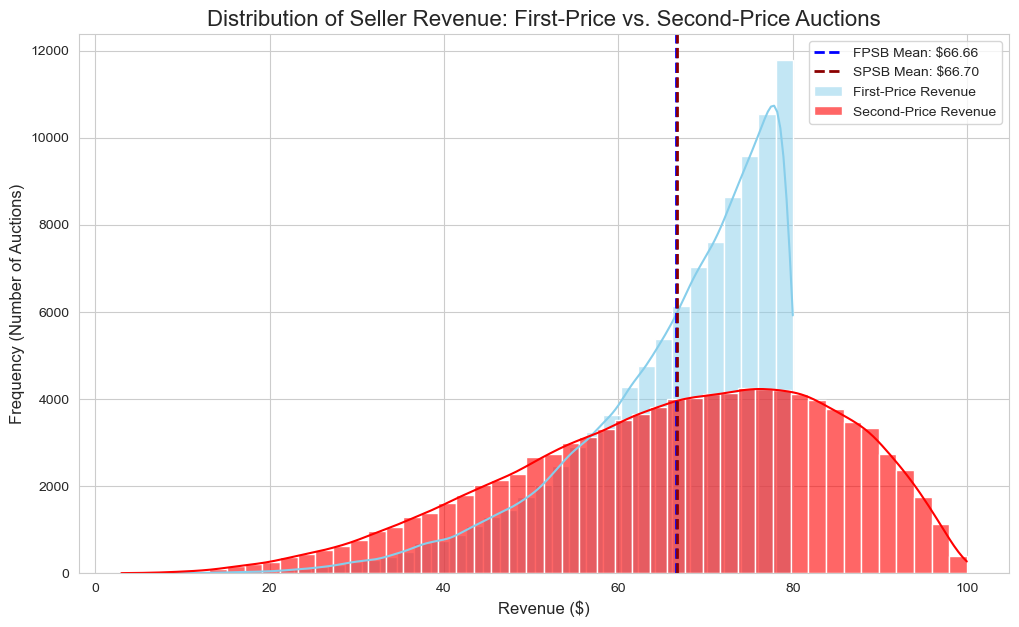

In [12]:
# Set a nice style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Plot the histogram for First-Price auctions
sns.histplot(results_df['fpsb_revenue'], color='skyblue', kde=True, label='First-Price Revenue', binwidth=2)

# Plot the histogram for Second-Price auctions on the same axes
sns.histplot(results_df['spsb_revenue'], color='red', kde=True, label='Second-Price Revenue', binwidth=2, alpha=0.6)

# Add vertical lines for the mean (average) revenue of each
plt.axvline(results_df['fpsb_revenue'].mean(), color='blue', linestyle='--', linewidth=2, label=f'FPSB Mean: ${results_df["fpsb_revenue"].mean():.2f}')
plt.axvline(results_df['spsb_revenue'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'SPSB Mean: ${results_df["spsb_revenue"].mean():.2f}')

# --- Add labels and title ---
plt.title('Distribution of Seller Revenue: First-Price vs. Second-Price Auctions', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Frequency (Number of Auctions)', fontsize=12)
plt.legend()
plt.show()

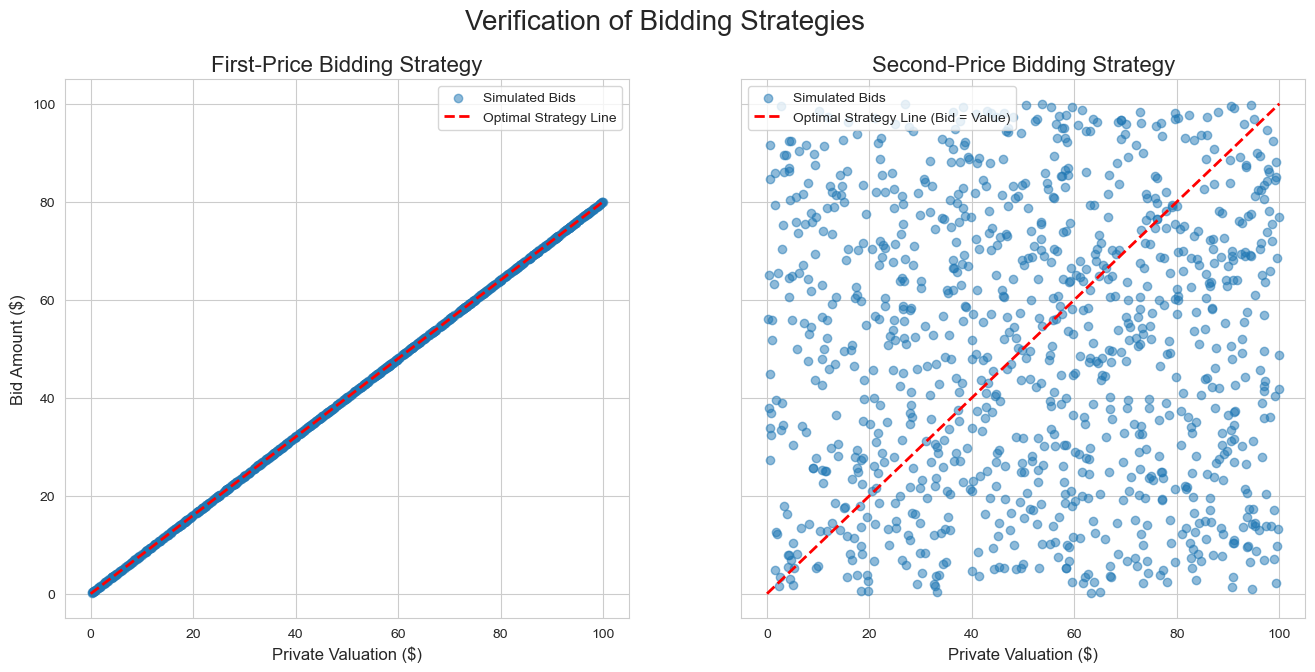

In [13]:
# We'll create two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# --- First Subplot: First-Price Strategy ---
# We only need a sample of points for a clean plot, not all 500,000
sample_size = 1000
ax1.scatter(scatter_valuations[:sample_size], scatter_fpsb_bids[:sample_size], alpha=0.5, label='Simulated Bids')
# Plot the theoretical "perfect" strategy line
ax1.plot([0, MAX_VALUE], [0, MAX_VALUE * (NUM_BIDDERS - 1) / NUM_BIDDERS], color='red', linestyle='--', linewidth=2, label='Optimal Strategy Line')
ax1.set_title('First-Price Bidding Strategy', fontsize=16)
ax1.set_xlabel('Private Valuation ($)', fontsize=12)
ax1.set_ylabel('Bid Amount ($)', fontsize=12)
ax1.legend()
ax1.grid(True)

# --- Second Subplot: Second-Price Strategy ---
ax2.scatter(scatter_valuations[:sample_size], scatter_spsb_bids[:sample_size], alpha=0.5, label='Simulated Bids')
# Plot the theoretical "perfect" strategy line (bid = value)
ax2.plot([0, MAX_VALUE], [0, MAX_VALUE], color='red', linestyle='--', linewidth=2, label='Optimal Strategy Line (Bid = Value)')
ax2.set_title('Second-Price Bidding Strategy', fontsize=16)
ax2.set_xlabel('Private Valuation ($)', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.suptitle('Verification of Bidding Strategies', fontsize=20)
plt.show()

C:\Users\Pranshu\AppData\Local\Temp\ipykernel_25132\486081165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Auction Type', y='Average Revenue', data=summary_df, palette='viridis')


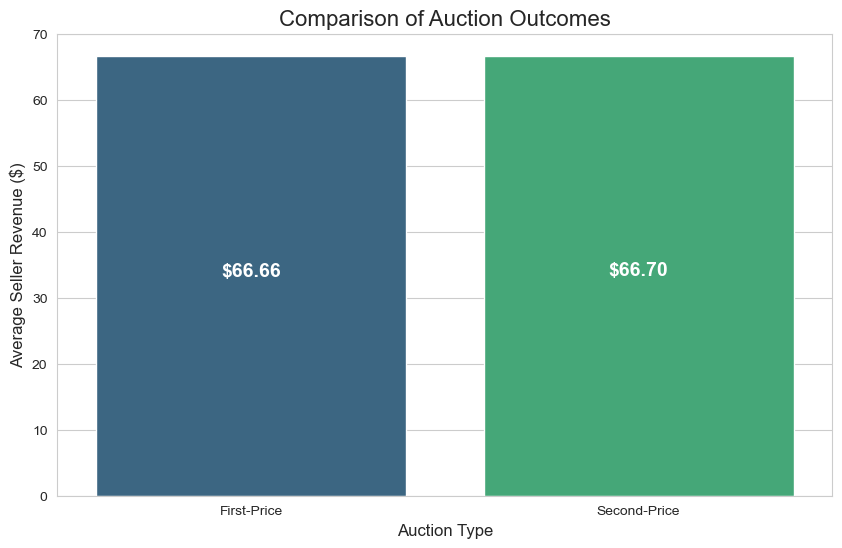

In [14]:
# --- Calculate Summary Statistics ---
# In our simple model, efficiency is always 100% for both
summary_stats = {
    'Auction Type': ['First-Price', 'Second-Price'],
    'Average Revenue': [results_df['fpsb_revenue'].mean(), results_df['spsb_revenue'].mean()],
    'Allocative Efficiency (%)': [100.0, 100.0]
}
summary_df = pd.DataFrame(summary_stats)

# --- Create the Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Auction Type', y='Average Revenue', data=summary_df, palette='viridis')

# --- Add labels and title ---
plt.title('Comparison of Auction Outcomes', fontsize=16)
plt.xlabel('Auction Type', fontsize=12)
plt.ylabel('Average Seller Revenue ($)', fontsize=12)

# Add the revenue values on top of the bars for clarity
for index, row in summary_df.iterrows():
    plt.text(index, row['Average Revenue'] / 2, f"${row['Average Revenue']:.2f}", color='white', ha="center", fontsize=14, weight='bold')

# Note: We don't plot efficiency here because it's 100% for both. If you had
# different efficiency results, you could create a second bar chart or a grouped bar chart.

plt.show()